In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [9]:
df = sns.load_dataset('iris')
color='C1'
alpha=1.
hue='species'
hue_palette='tab10'
kde_on_marginals=True
quantile_contour_levels=[0.1, 0.25, 0.5, 0.75, 0.9]
N = df.shape[0]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
N

150

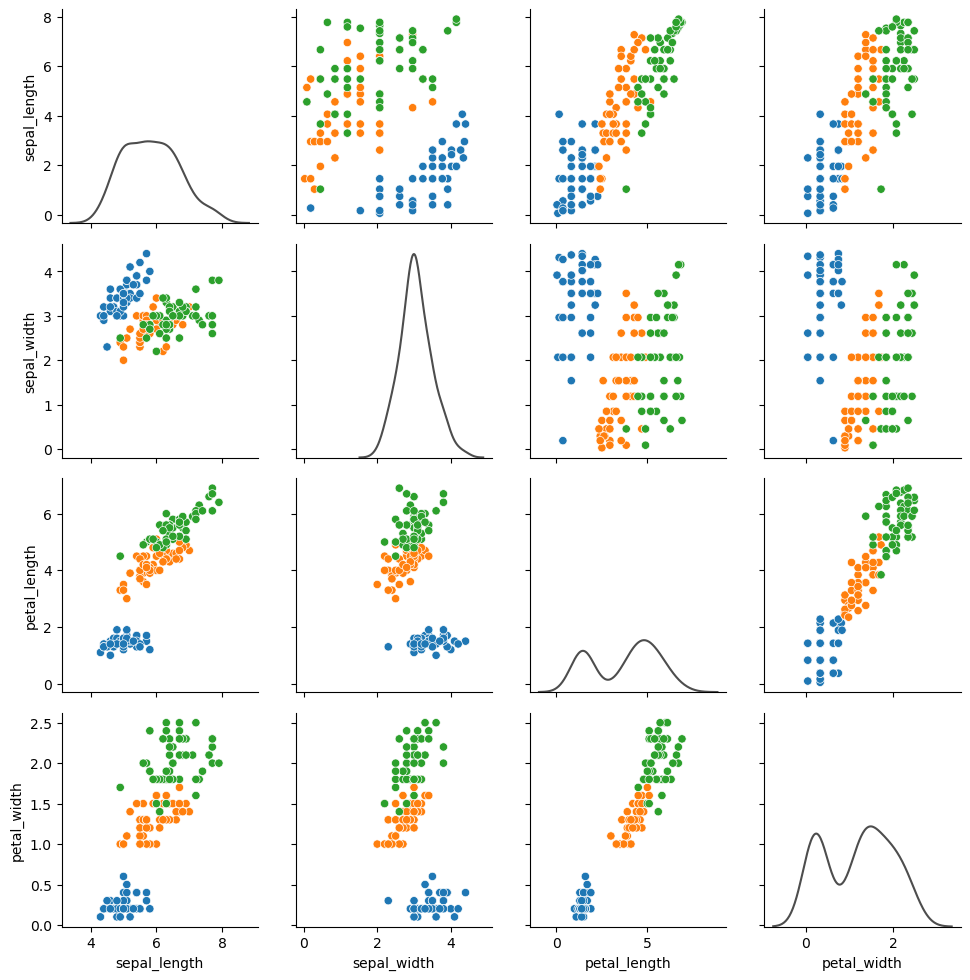

In [13]:
df_numeric = df._get_numeric_data()
plotted_cols = np.array(df_numeric.columns)
plotted_cols = np.delete(plotted_cols, np.where(plotted_cols == hue)).tolist()
if hue is not None:
    copulogram = sns.PairGrid(df[plotted_cols + [hue]], hue=hue)
    if kde_on_marginals:
        copulogram.map_diag(sns.kdeplot, hue=None, color=".3")
    else:
        copulogram.map_diag(sns.histplot, hue=None, color=".3", bins=20)
    copulogram.map_lower(sns.scatterplot, palette=hue_palette, alpha=alpha)
    temp = df_numeric[plotted_cols].rank() / N * df_numeric[plotted_cols].max().values
    temp[hue] = df[hue]
    copulogram.data = temp
    copulogram = copulogram.map_upper(sns.scatterplot, palette=hue_palette, alpha=alpha)
else : 
    copulogram = sns.PairGrid(df_numeric)
    if kde_on_marginals:
        copulogram.map_diag(sns.kdeplot, hue=None, color=color)
    else:
        copulogram.map_diag(sns.histplot, hue=None, color=color, bins=20)
    copulogram.map_lower(plt.scatter, color=color, alpha=alpha)
    temp = df_numeric.rank() / N * df_numeric.max().values
    copulogram.data = temp
    copulogram = copulogram.map_upper(plt.scatter, color=color, alpha=alpha)
copulogram;